In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

%matplotlib inline

In [2]:
def dateparse(date) -> str:
    date = date.split("-")
    return "%s-%s" % (date[0], date[1])

In [3]:
kernels_data = pd.read_csv(
    "data/kaggle/all_data.csv",
    parse_dates=["date"],
    date_parser=dateparse
)

In [4]:
kernels_data.head(5)


,medal,language,comments,votes,date
0,bronze,R,4,12,2017-09-01
1,NaN,Python,3,2,2017-09-01
2,NaN,Python,0,0,2017-09-01
3,NaN,Python,0,0,2017-09-01
4,NaN,Python,0,1,2017-09-01


In [5]:
languages = kernels_data[["date", "language"]]

In [7]:
languages.head()

,date,language
0,2017-09-01,R
1,2017-09-01,Python
2,2017-09-01,Python
3,2017-09-01,Python
4,2017-09-01,Python


In [8]:
languages_graph = languages.groupby(["date","language"]).size().to_frame("Total")
languages_graph.head()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>Total</th>
    </tr>
    <tr>
      <th>date</th>
      <th>language</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2015-03-01</th>
      <th>R</th>
      <td>17</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">2015-04-01</th>
      <th>Python</th>
      <td>156</td>
    </tr>
    <tr>
      <th>R</th>
      <td>189</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">2015-05-01</th>
      <th>Julia</th>
      <td>13</td>
    </tr>
    <tr>
      <th>Python</th>
      <td>212</td>
    </tr>
  </tbody>
</table>
</div>

In [9]:
languages_graph_unstacked = languages_graph.unstack()
languages_graph_unstacked.head()


<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="4" halign="left">Total</th>
    </tr>
    <tr>
      <th>language</th>
      <th>Julia</th>
      <th>Python</th>
      <th>R</th>
      <th>SQLite</th>
    </tr>
    <tr>
      <th>date</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2015-03-01</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>17.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2015-04-01</th>
      <td>NaN</td>
      <td>156.0</td>
      <td>189.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2015-05-01</th>
      <td>13.0</td>
      <td>212.0</td>
      <td>202.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2015-06-01</th>
      <td>9.0</td>
      <td>309.0</td>
      <td>203.0</td>
      <td>26.0</td>
    </tr>
    <tr>
      <th>2015-07-01</th>
      <td>25.0</td>
      <td>593.0</td>
      <td>364.0</td>
      <td>15.0</td>
    </tr>
  </tbody>
</table>
</div>

In [105]:
languages_graph_unstacked_quarter = languages_graph_unstacked.resample("Q").sum()
languages_graph_unstacked_quarter.head()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="4" halign="left">Total</th>
    </tr>
    <tr>
      <th>language</th>
      <th>Julia</th>
      <th>Python</th>
      <th>R</th>
      <th>SQLite</th>
    </tr>
    <tr>
      <th>date</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2015-03-31</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>17.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2015-06-30</th>
      <td>22.0</td>
      <td>677.0</td>
      <td>594.0</td>
      <td>26.0</td>
    </tr>
    <tr>
      <th>2015-09-30</th>
      <td>37.0</td>
      <td>1410.0</td>
      <td>1250.0</td>
      <td>146.0</td>
    </tr>
    <tr>
      <th>2015-12-31</th>
      <td>13.0</td>
      <td>1401.0</td>
      <td>1345.0</td>
      <td>110.0</td>
    </tr>
    <tr>
      <th>2016-03-31</th>
      <td>18.0</td>
      <td>2158.0</td>
      <td>1554.0</td>
      <td>124.0</td>
    </tr>
  </tbody>
</table>
</div>

In [107]:
def quarterlyMonthNmaes(x): 
    start_date = x.name - pd.offsets.MonthBegin(3)
    final_date = str(start_date.strftime('%b')) + " - " + str(x.name.strftime('%b, %Y'))
    return final_date
languages_graph_unstacked_quarter_new_months = languages_graph_unstacked_quarter.copy()
languages_graph_unstacked_quarter_new_months.index = languages_graph_unstacked_quarter["Total"].apply(quarterlyMonthNmaes, axis=1) 
languages_graph_unstacked_quarter_new_months.head(10)

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="4" halign="left">Total</th>
    </tr>
    <tr>
      <th>language</th>
      <th>Julia</th>
      <th>Python</th>
      <th>R</th>
      <th>SQLite</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Jan - Mar, 2015</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>17.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>Apr - Jun, 2015</th>
      <td>22.0</td>
      <td>677.0</td>
      <td>594.0</td>
      <td>26.0</td>
    </tr>
    <tr>
      <th>Jul - Sep, 2015</th>
      <td>37.0</td>
      <td>1410.0</td>
      <td>1250.0</td>
      <td>146.0</td>
    </tr>
    <tr>
      <th>Oct - Dec, 2015</th>
      <td>13.0</td>
      <td>1401.0</td>
      <td>1345.0</td>
      <td>110.0</td>
    </tr>
    <tr>
      <th>Jan - Mar, 2016</th>
      <td>18.0</td>
      <td>2158.0</td>
      <td>1554.0</td>
      <td>124.0</td>
    </tr>
    <tr>
      <th>Apr - Jun, 2016</th>
      <td>16.0</td>
      <td>3017.0</td>
      <td>1854.0</td>
      <td>78.0</td>
    </tr>
    <tr>
      <th>Jul - Sep, 2016</th>
      <td>3.0</td>
      <td>10247.0</td>
      <td>2465.0</td>
      <td>27.0</td>
    </tr>
    <tr>
      <th>Oct - Dec, 2016</th>
      <td>10.0</td>
      <td>20598.0</td>
      <td>3621.0</td>
      <td>48.0</td>
    </tr>
    <tr>
      <th>Jan - Mar, 2017</th>
      <td>1.0</td>
      <td>28746.0</td>
      <td>4236.0</td>
      <td>37.0</td>
    </tr>
    <tr>
      <th>Apr - Jun, 2017</th>
      <td>9.0</td>
      <td>21082.0</td>
      <td>3208.0</td>
      <td>21.0</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
languages_graph_unstacked_quarter_new_months["Total"].plot.bar(figsize=(14,7), rot=0,  title="Language used in Kaggle kernels by quarter")


language,R,Python
"Apr - Jun, 2015",594.0,677.0
"Jul - Sep, 2015",1250.0,1410.0
"Oct - Dec, 2015",1345.0,1401.0
"Jan - Mar, 2016",1554.0,2158.0
"Apr - Jun, 2016",1854.0,3017.0
"Jul - Sep, 2016",2465.0,10247.0
"Oct - Dec, 2016",3621.0,20598.0
"Jan - Mar, 2017",4236.0,28746.0
"Apr - Jun, 2017",3208.0,21082.0


In [159]:
languages_python_r = languages_graph_unstacked_quarter_new_months["Total"][["R", "Python"]]
languages_python_r.fillna(0, inplace=True)
languages_python_r.drop(languages_python_r.index[[0,10]], inplace=True)

languages_python_r

language,R,Python
"Apr - Jun, 2015",594.0,677.0
"Jul - Sep, 2015",1250.0,1410.0
"Oct - Dec, 2015",1345.0,1401.0
"Jan - Mar, 2016",1554.0,2158.0
"Apr - Jun, 2016",1854.0,3017.0
"Jul - Sep, 2016",2465.0,10247.0
"Oct - Dec, 2016",3621.0,20598.0
"Jan - Mar, 2017",4236.0,28746.0
"Apr - Jun, 2017",3208.0,21082.0


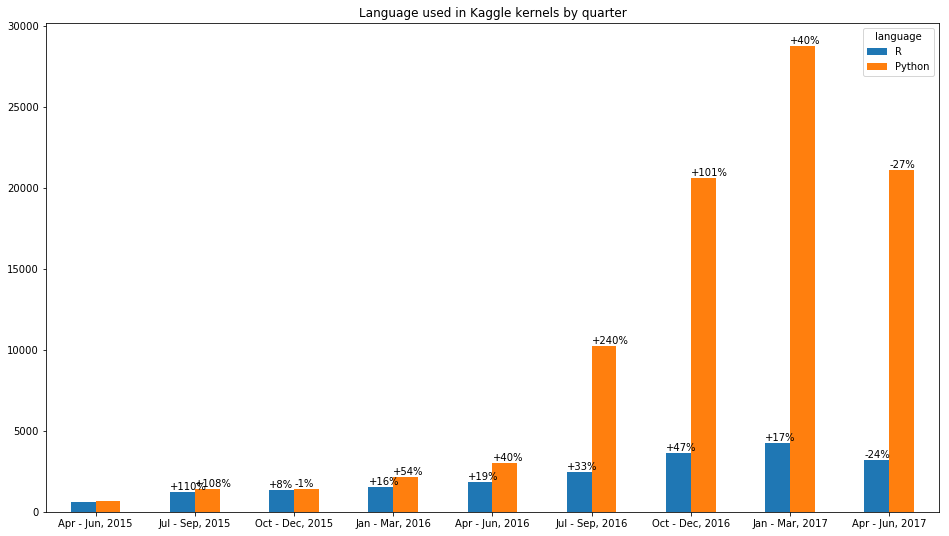

In [162]:
def growth(current, previous):
    increase = current - previous
    if increase != 0.0 and previous != 0.0:
        number = round(increase / previous * 100)
        return '{0:{1}}'.format(number, '+' if number else '') 
    return 0

ax = languages_python_r.plot.bar(figsize=(16,9), rot=0,  title="Language used in Kaggle kernels by quarter")
for index, p in enumerate(ax.patches):
    previous_height = ax.patches[index - 1].get_height()
    if index == 0 or index == 9: continue
    ax.annotate(str(growth(p.get_height(), previous_height)) + "%", ((p.get_x()), int(p.get_height() + 150)))

In [184]:
medals = kernels_data[["date", "language", "medal"]]
medals.head()

,date,language,medal
0,2017-09-01,R,bronze
1,2017-09-01,Python,NaN
2,2017-09-01,Python,NaN
3,2017-09-01,Python,NaN
4,2017-09-01,Python,NaN


In [193]:
def medals_to_points(x):
    if x == "gold": 
        return 3
    if x == "bronze":
        return 1
    if x == "silver":
        return 2
    return 0
medals.fillna(0, inplace=True)
medals_transformed = medals.copy()
medals_transformed["medal"] = medals_transformed["medal"].apply(medals_to_points)
medals_transformed.head()


92939
21211


In [199]:
python_nr_kernals = medals_transformed.loc[medals_transformed["language"] == "Python"].count().medal
r_nr_kernels = medals_transformed.loc[medals_transformed["language"] == "R"].count().medal
print(python_nr_kernals)
print(r_nr_kernels)

92939
21211


In [226]:
medals_transformed_points = medals_transformed.groupby(["language"]).sum()
python_points = medals_transformed_points.loc["Python"].medal
r_points = medals_transformed_points.loc["R"].medal
print(python_points)
print(r_points)


2241
1235


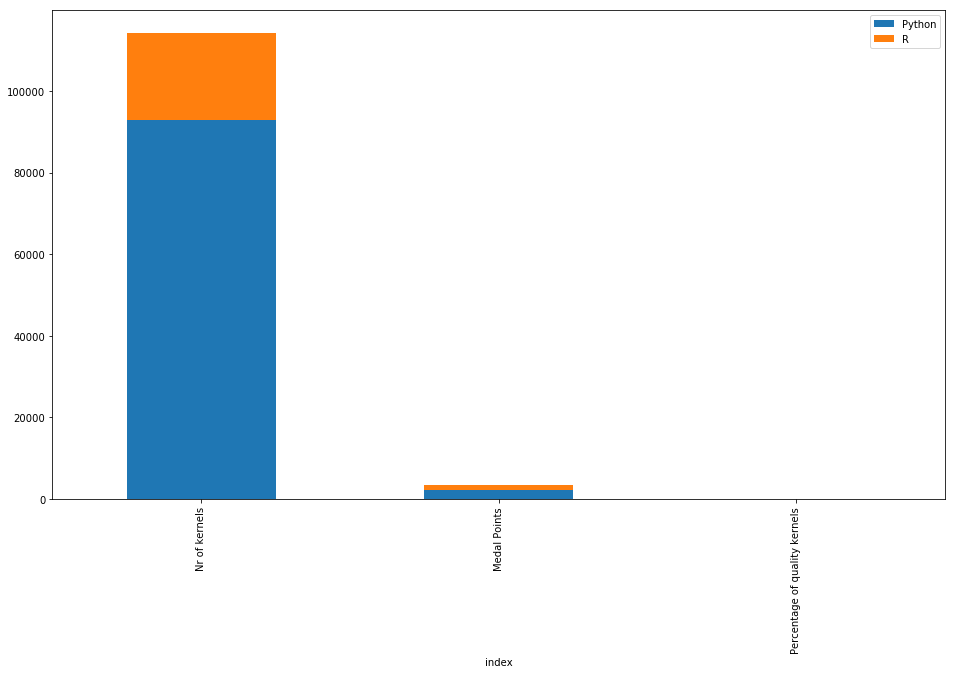

In [231]:
def medals_percentage(percent, whole):
  return round((percent * 100.0) / whole, 1)

python_quality_kernels_percentage = medals_percentage(python_points, python_nr_kernals)
r_quality_kernels_percentage = medals_percentage(r_points, r_nr_kernels)
print(python_quality_kernels_percentage)
print(r_quality_kernels_percentage)

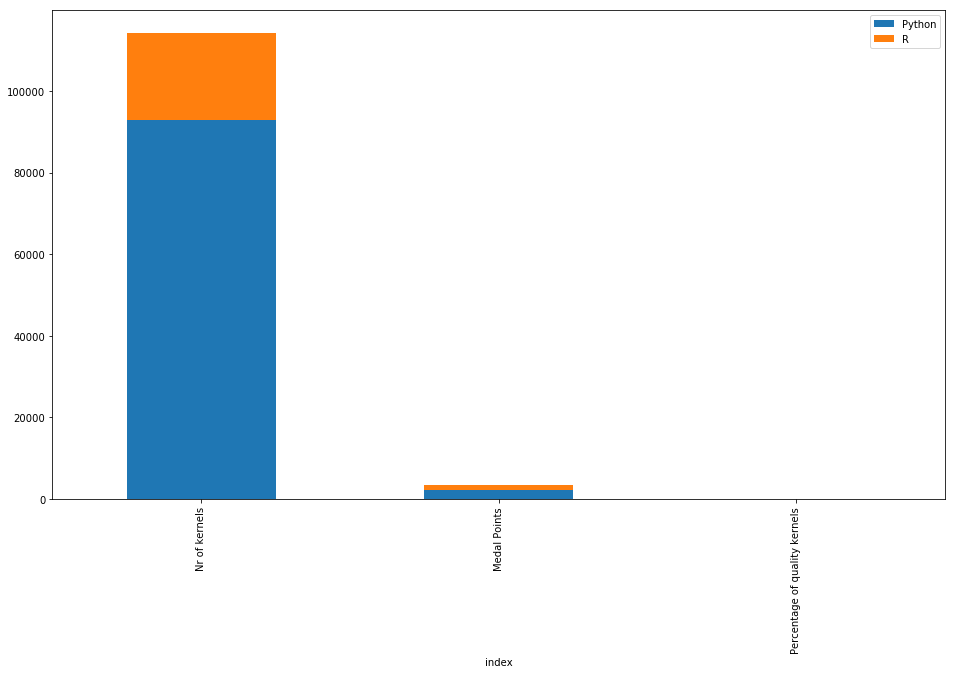

In [235]:
medals_graph = pd.DataFrame({"index": ["Nr of kernels", "Medal Points", "Percentage of quality kernels"], "R": [r_nr_kernels,r_points,r_quality_kernels_percentage], "Python": [python_nr_kernals,python_points,python_quality_kernels_percentage] })
medals_graph.set_index("index", inplace=True)
medals_graph.head()

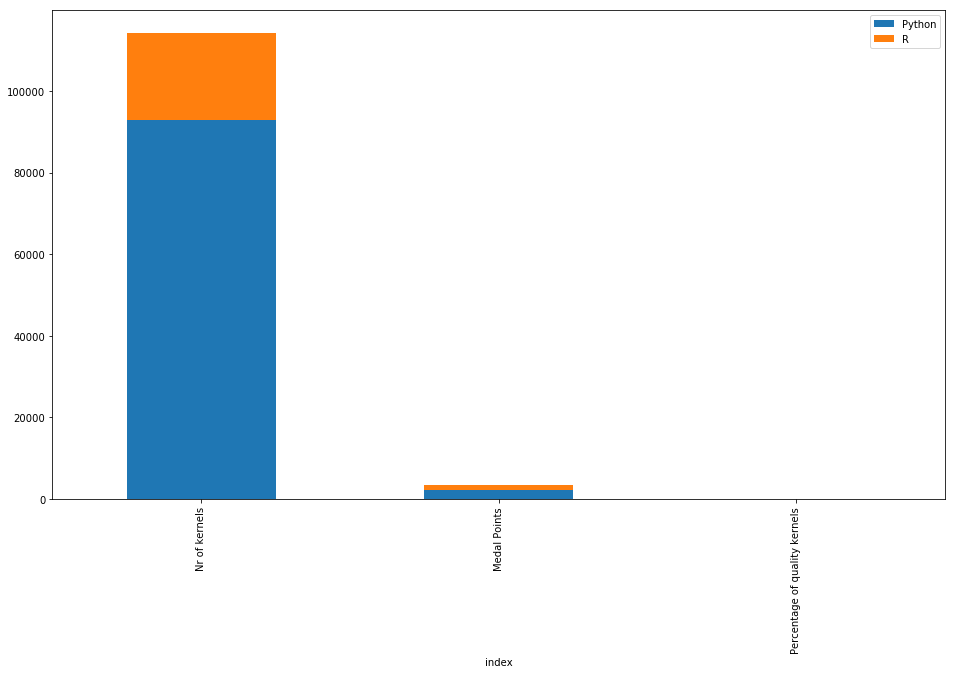

In [ ]:
medals_graph.plot.bar(figsize=(16,9))


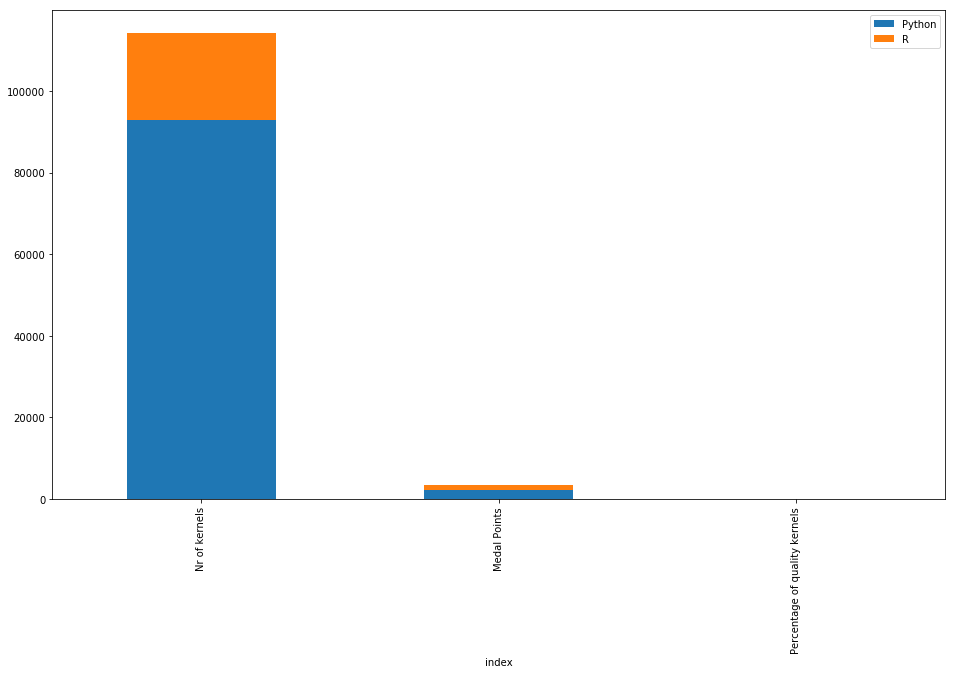

In [192]:
ax = medals_transformed_graph_quarterly_months.plot.bar(figsize=(16,9), rot=0,  title="Language used in Kaggle kernels by quarter")
for index, p in enumerate(ax.patches):
    previous_height = ax.patches[index - 1].get_height()
    if index == 0 or index == 9: continue
    ax.annotate(str(growth(p.get_height(), previous_height)) + "%", ((p.get_x()), int(p.get_height() + 150)))


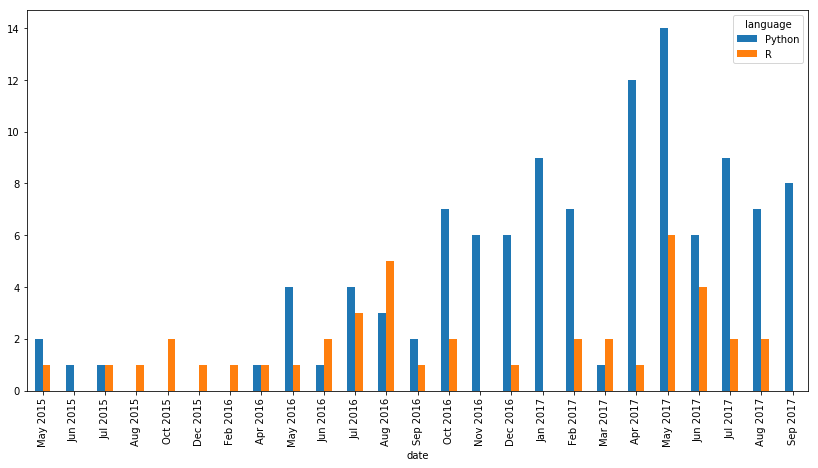

In [167]:
only_gold_medals_graph.index = only_gold_medals_graph.index.map(lambda x: x.strftime('%b %Y'))
only_gold_medals_graph["Total"].plot.bar(figsize=(14,7))